# Import necessary modules

In [43]:
import librosa  # for audio processing
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile  # for audio processing
from numpy.lib.stride_tricks import as_strided
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import Audio
import sklearn
import pandas as pd
import json
import os
from os.path import exists
import warnings
warnings.filterwarnings("ignore")
sys.path.append('../scripts')
from audio_trans_loader import AudioLoader
from Audio_visualization import AudioVis
from audio_augment import AugmentAudio
# from cleaner import CleanDataFrame

In [44]:
# Create cleaner module and plotter module classes
loader = AudioLoader()
visualizer = AudioVis()
augment = AugmentAudio()

# Variables for data paths 

In [45]:
train_dataset_location = 'train/'
train_wav_location = os.path.join(train_dataset_location, 'wav/')
train_changed_wav_location = os.path.join(train_dataset_location, 'changed_wav/')
train_txt_location = os.path.join(train_dataset_location, 'trsTrain.txt')
test_dataset_location = 'test/' 
lexicon_location = 'train/'

In [46]:
# %cd drive/MyDrive/Week-4-STT/data/AMHARIC/data/
%cd ../data/

c:\Users\User\Desktop\10AcademyProjects\speech-to-text\Speech-to-Text\data


# Load Train Data and Transcription File

In [47]:
train_file_names = os.listdir(train_wav_location)
train_wav_paths = [ os.path.join(train_wav_location, file_name)
                    for file_name in train_file_names]
print(f"We have {len(train_wav_paths)} Amharic wav files in the training set")

We have 8119 Amharic wav files in the training set


In [48]:
transcription = loader.loaderTrans(train_txt_location)

In [51]:
# we will use the first wav file to visualize its characteristics
#librosa load returns by default time-series as numpy array and with the default sample rate of 22KHZ so we just changed it to 44kHZ
samples, sample_rate = librosa.load(train_wav_location+'tr_1_tr01001.wav' , sr=44100)
print(samples)
print(sample_rate)

[-0.00502738 -0.00588078 -0.00577551 ... -0.00516981 -0.00347923
  0.        ]
44100


# Change Mono Channel To Stereo

In [52]:
# Change 10 mono files for demo
for file_name in train_file_names[0:10]:
    loader.change_channel_to_stereo(os.path.join(train_wav_location, file_name) , os.path.join(train_changed_wav_location, file_name))
        

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=90112, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=98304, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=86016, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=106496, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=104448, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=88064, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=71680, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=77824, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframe

# Data Visualization

In [53]:
ipd.Audio(samples, rate=sample_rate)

# Plot of the Audio Array

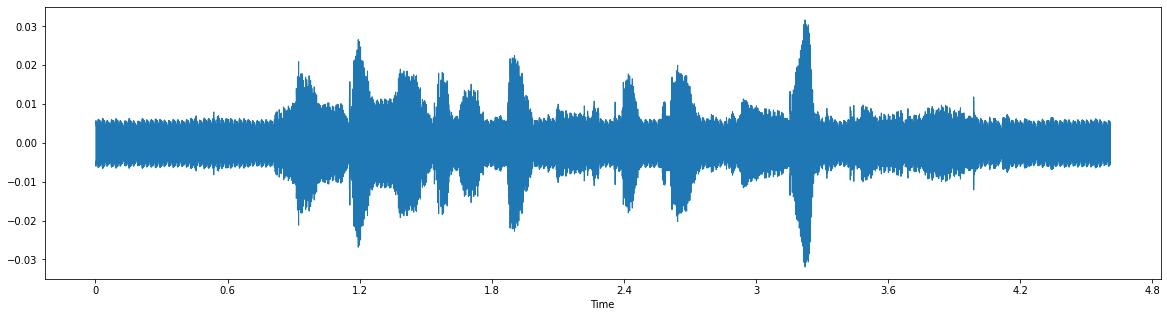

In [54]:
# Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(samples, sr=sample_rate)
plt.show()

# Plot of spectogram of the audio 
    - Convert time domain into frequency domain

In [55]:
spe_samples, frequency = loader.spectrogram(samples)
print(frequency)
print(spe_samples)

[0.        0.0078125 0.015625  0.0234375 0.03125   0.0390625 0.046875
 0.0546875 0.0625    0.0703125 0.078125  0.0859375 0.09375   0.1015625
 0.109375  0.1171875 0.125     0.1328125 0.140625  0.1484375 0.15625
 0.1640625 0.171875  0.1796875 0.1875    0.1953125 0.203125  0.2109375
 0.21875   0.2265625 0.234375  0.2421875 0.25      0.2578125 0.265625
 0.2734375 0.28125   0.2890625 0.296875  0.3046875 0.3125    0.3203125
 0.328125  0.3359375 0.34375   0.3515625 0.359375  0.3671875 0.375
 0.3828125 0.390625  0.3984375 0.40625   0.4140625 0.421875  0.4296875
 0.4375    0.4453125 0.453125  0.4609375 0.46875   0.4765625 0.484375
 0.4921875 0.5       0.5078125 0.515625  0.5234375 0.53125   0.5390625
 0.546875  0.5546875 0.5625    0.5703125 0.578125  0.5859375 0.59375
 0.6015625 0.609375  0.6171875 0.625     0.6328125 0.640625  0.6484375
 0.65625   0.6640625 0.671875  0.6796875 0.6875    0.6953125 0.703125
 0.7109375 0.71875   0.7265625 0.734375  0.7421875 0.75      0.7578125
 0.765625  0.77343

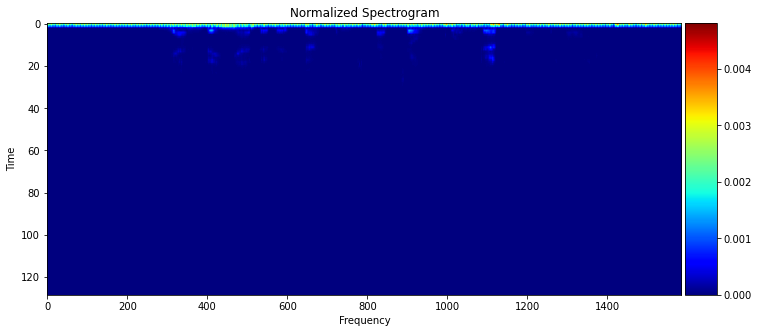

In [57]:
visualizer.plot_spectrogram_feature(spe_samples)

# Plot STFT
    - STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows as shown below

    - Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal

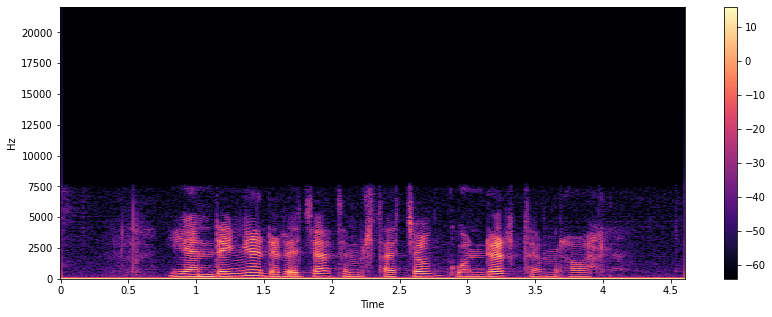

In [58]:
visualizer.plot_stft(samples,sample_rate)

# Plot the spectral Centroid

In [59]:
spectral_centroids = librosa.feature.spectral_centroid(
    samples, sr=sample_rate)[0]

spectral_centroids.shape

(397,)

In [60]:
# # Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

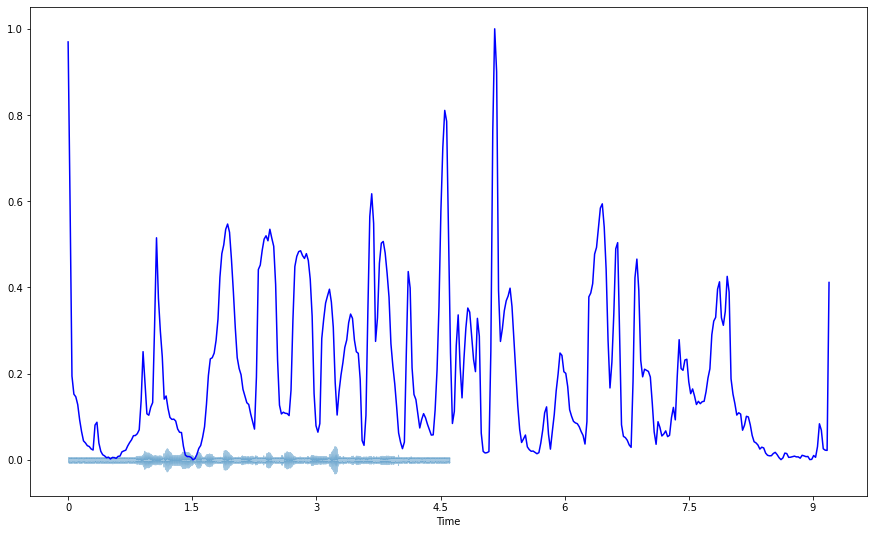

In [61]:
visualizer.plot_spectral_centroid(t,spectral_centroids,samples,sample_rate)

# Plot Spectral rolloff

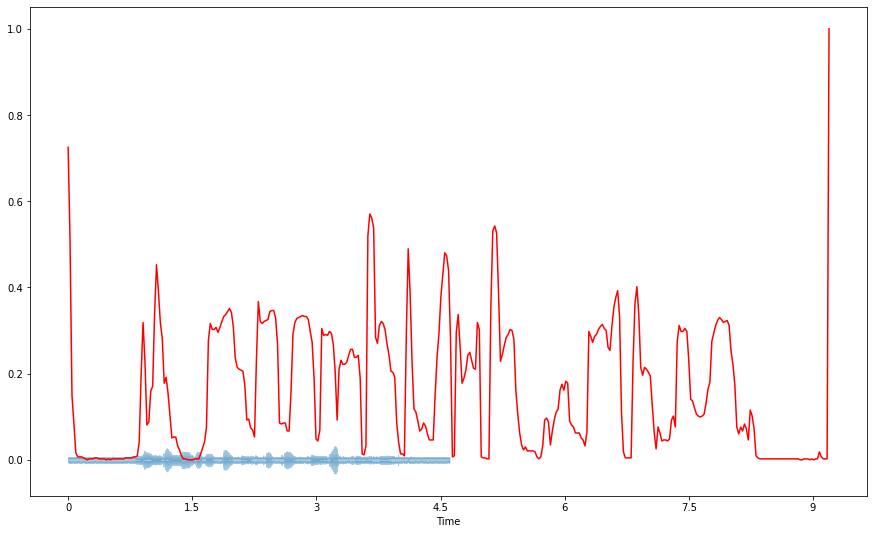

In [62]:
spectral_rolloff = librosa.feature.spectral_rolloff(
    samples+0.01, sr=sample_rate)[0]
visualizer.plot_spectral_rolloff(t,spectral_rolloff,samples,sample_rate)


# Plot Spectral Bandwidth

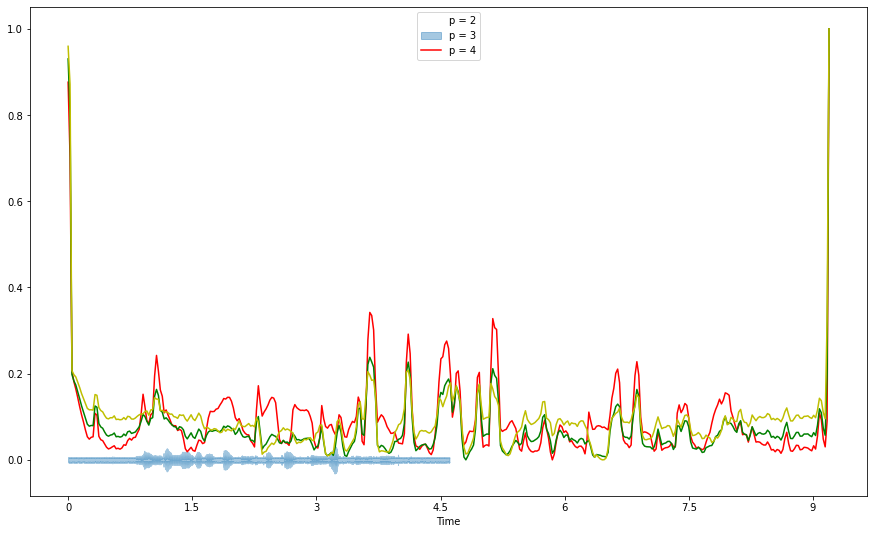

In [63]:
visualizer.plot_spectral_bandwidth(t,samples,sample_rate)

# Data Augmentation

# Using Time shifting
    - Plotting Spectogram along with amplitude graph for visual comparison

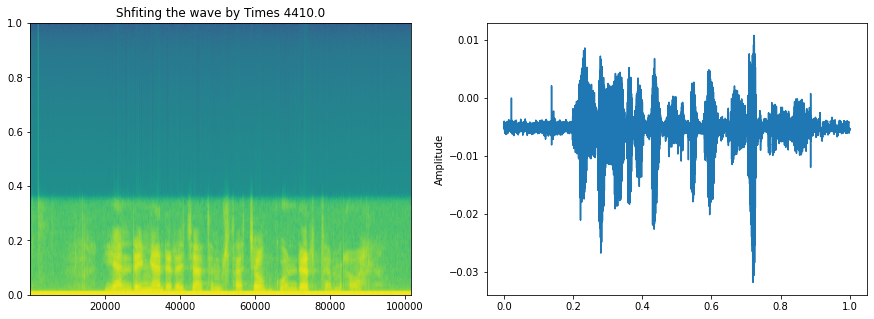

In [64]:
wav_roll = np.roll(samples, int(sample_rate/10))
visualizer.plot_spec(data=wav_roll, sr=sample_rate)
# ipd.Audio(wav_roll,rate=sample_rate)

# Adding noise into the audio

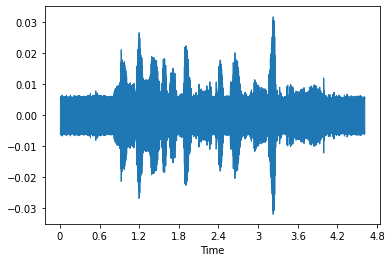

In [66]:

noise_added = augment.add_noise(samples, noise_factor=0.0001)
librosa.display.waveshow(noise_added, sr=sample_rate)
Audio(data=noise_added, rate=sample_rate)

# using time shift by sample_rate/5 factor

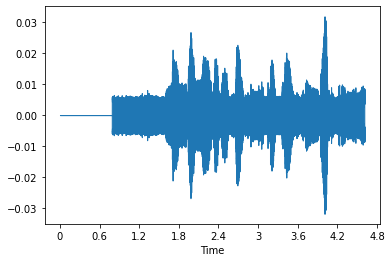

In [67]:
time_shifted = augment.add_time_shift(samples, sample_rate, 5, 'both')
librosa.display.waveshow(time_shifted, sr=sample_rate)
Audio(data=time_shifted, rate=sample_rate)

# using pitch shift

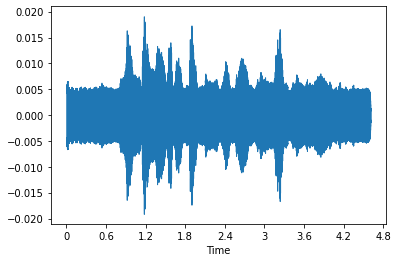

In [68]:
pitch_shifted = augment.change_pitch(samples, sample_rate, pitch_factor=0.1)
librosa.display.waveshow(pitch_shifted, sr=sample_rate)
Audio(data=pitch_shifted, rate=sample_rate)

# Feature Extraction from Audios

# Plot Mel-Frequency Cepstral Coefficients(MFCCs)

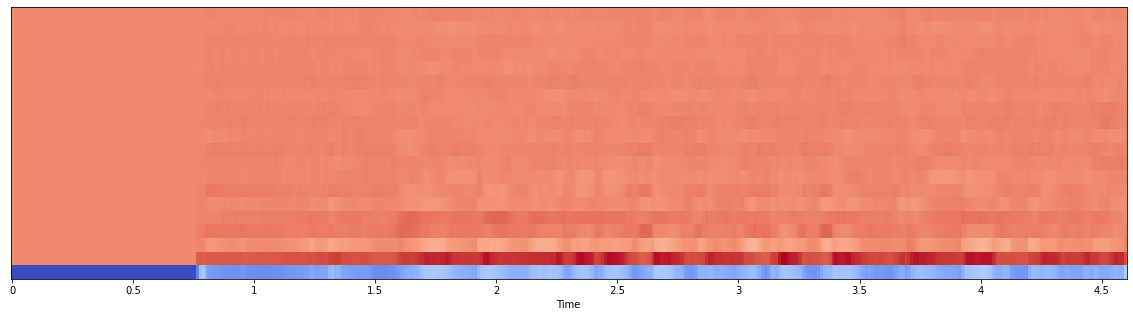

In [69]:
visualizer.plot_mfcc(time_shifted,sample_rate)

# Create Dataframe with extracted data and save to file

In [71]:
filenames, target, duration_of_recordings,mode ,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc,rate = loader.meta_data(transcription, train_wav_location)
data = pd.DataFrame({'key': filenames, 'text': target,
                    'duration': duration_of_recordings, 'mode': mode , 'rate': rate ,'rmse': rmse,'spec_cent' :spec_cent,'spec_bw': spec_bw,"rolloff" :rolloff,"zcr": zcr,"mfcc": mfcc})
data.head()
# print(data.shape)

,key,text,duration,mode,rate,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc
0,train/wav/tr_1_tr01001.wav,ያንደኛ ደረጃ ትምህርታቸው ን ጐንደር ተ ም ረዋል,4.608005,mono,44100,0.005627,713.781516,1236.804586,1485.248618,0.004273,-18.103716
1,train/wav/tr_2_tr01002.wav,የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስ...,16.384014,mono,44100,0.005557,769.171143,1256.989803,1618.360516,0.003095,-17.840212
2,train/wav/tr_3_tr01003.wav,በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ...,14.592018,mono,44100,0.005417,783.725021,1286.675508,1654.442077,0.001926,-18.258934
3,train/wav/tr_4_tr01004.wav,ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው,4.736009,mono,44100,0.005535,687.372255,1161.387180,1368.097283,0.004953,-18.796532
4,train/wav/tr_5_tr01005.wav,ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳ...,8.192018,mono,44100,0.005626,782.274709,1257.456211,1691.149453,0.003393,-18.172558


In [72]:
md_json = data.to_dict(orient='records')
with open("train_corpus.json", "w", encoding='UTF-8') as export_file:
            json.dump(md_json, export_file, indent=4,
                     sort_keys=True, ensure_ascii=False)
